In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from icecube import dataio,icetray

In [51]:
linefit_dm_zen,actual_dm_zen_plus,actual_dm_zen_minus=[],[],[]
linefit_sm_zen,actual_sm_zen=[],[]
energy_sm=[]
x_sm,y_sm=[],[]
actual_sm_azi=[]

In [14]:
double_muon_file='/data/icecube/ssarkar/trident_event_sample/DC_10TeV_DT_nm_l2.i3'
single_muon_file='/data/icecube/ssarkar/trident_event_sample/DC_10TeV_ST_nm_l2.i3'
with dataio.I3File(double_muon_file) as f1:
    for frame in f1:
        if(frame.Stop==icetray.I3Frame.Physics):
            if('LineFit' in frame.keys()):
                linefit_dm_zen.append(frame['LineFit'].dir.zenith)
                actual_dm_zen_plus.append(frame['I3MCTree'][1].dir.zenith)  
                actual_dm_zen_minus.append(frame['I3MCTree'][2].dir.zenith) 
                
    

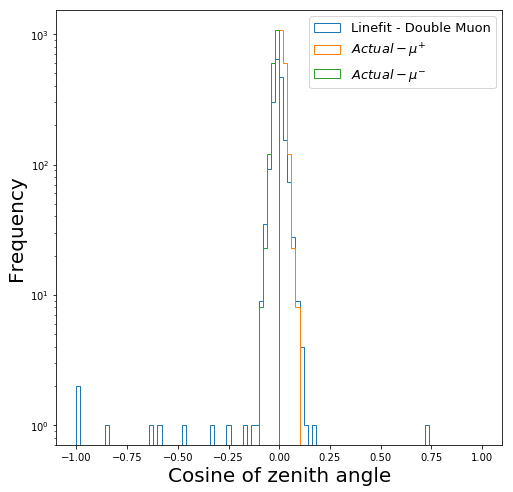

In [29]:
plt.figure(figsize=(8,8))
plt.hist(np.cos(linefit_dm_zen),bins=100,range=[-1,1],histtype='step',label='Linefit - Double Muon')
plt.hist(np.cos(actual_dm_zen_plus),bins=100,range=[-1,1],histtype='step',label='$Actual-\mu^{+}$')
plt.hist(np.cos(actual_dm_zen_minus),bins=100,range=[-1,1],histtype='step',label='$Actual-\mu^{-}$')
plt.xlabel('Cosine of zenith angle',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.yscale('log')
plt.legend(fontsize=13)
plt.show()

In [57]:
with dataio.I3File(single_muon_file) as f2:
    for frame in f2:
        if(frame.Stop==icetray.I3Frame.Physics):
            if('LineFit' in frame.keys()):
                particle=frame['I3MCTree'][1]
                linefit_sm_zen.append(frame['LineFit'].dir.zenith)
                actual_sm_zen.append(particle.dir.zenith) 
                x_sm.append(particle.pos.x)
                y_sm.append(particle.pos.y)
                energy_sm.append(particle.energy)
                azi=particle.dir.azimuth
                actual_sm_azi=np.append(actual_sm_azi,np.array(azi))

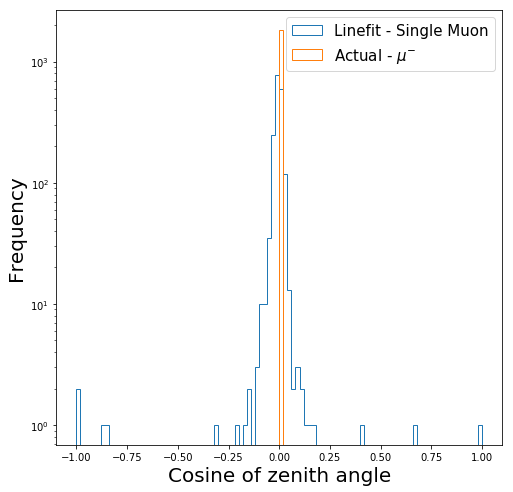

In [53]:
plt.figure(figsize=(8,8))
plt.hist(np.cos(linefit_sm_zen),bins=100,range=[-1,1],histtype='step',label='Linefit - Single Muon')
plt.hist(np.cos(actual_sm_zen),bins=100,range=[-1,1],histtype='step',label='Actual - $\mu^{-}$')
plt.xlabel('Cosine of zenith angle',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.yscale('log')
plt.legend(fontsize=15)
plt.show()


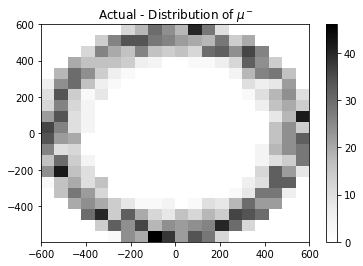

In [43]:
plt.hist2d(x_sm,y_sm,bins=(20,20),cmap=plt.cm.Greys)
plt.colorbar()
plt.title('Actual - Distribution of $\mu^{-}$')

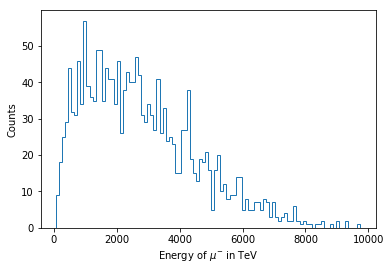

In [55]:
plt.hist(energy_sm,bins=100,range=[min(energy_sm),max(energy_sm)],histtype='step')
plt.xlabel('Energy of $\mu^{-}$ in TeV')
plt.ylabel('Counts')
plt.show()

In [58]:
print(actual_sm_azi)

[3.5226497  5.64458203 3.05178615 ... 4.81284097 0.19955089 1.97226349]


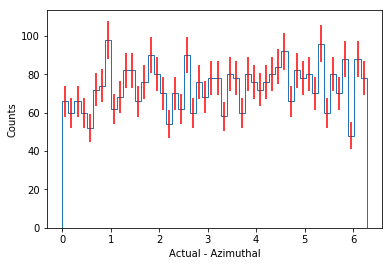

In [67]:
hist,bins=np.histogram(actual_sm_azi,bins=50,range=[min(actual_sm_azi),max(actual_sm_azi)])
average=(bins[:-1]+bins[1:])/2
error=np.sqrt(hist)
plt.hist(actual_sm_azi, bins=50, range=[min(actual_sm_azi), max(actual_sm_azi)], histtype='step')
plt.errorbar(average, hist, yerr=error,fmt=" ",color='r')
plt.xlabel('Actual - Azimuthal')
plt.ylabel('Counts')